# Using Imagery Layers 

The `arcgis.raster` module contains classes and raster analysis functions for working with raster data and imagery layers.

Raster data is made up of a grid of cells, where each cell or pixel can have a value. Raster data is useful for storing data that varies continuously, as in a satellite image, a surface of chemical concentrations, or an elevation surface.

The `Imagerylayer` class represents an image service resource as a layer. An `ImageryLayer` object retrieves and displays data from image services. `ImageryLayer` allows you to and apply server defined or client-defined rendering rules (e.g. remap, colormap), and mosaic rules.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-Imagery-Layers" data-toc-modified-id="Using-Imagery-Layers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using Imagery Layers</a></span><ul class="toc-item"><li><span><a href="#Accesssing-Imagery-Layers" data-toc-modified-id="Accesssing-Imagery-Layers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Accesssing Imagery Layers</a></span><ul class="toc-item"><li><span><a href="#Searching-the-GIS-for-imagery-layer-items" data-toc-modified-id="Searching-the-GIS-for-imagery-layer-items-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Searching the GIS for imagery layer items</a></span></li><li><span><a href="#Retrieving-Imagery-Layer-item-using-item-id" data-toc-modified-id="Retrieving-Imagery-Layer-item-using-item-id-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Retrieving Imagery Layer item using item id</a></span></li><li><span><a href="#Accessing-ImageryLayer-from-Imagery-Layer-items" data-toc-modified-id="Accessing-ImageryLayer-from-Imagery-Layer-items-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Accessing <code>ImageryLayer</code> from Imagery Layer items</a></span></li><li><span><a href="#Creating-ImageryLayer-from-an-image-service-url" data-toc-modified-id="Creating-ImageryLayer-from-an-image-service-url-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Creating <code>ImageryLayer</code> from an image service url</a></span></li><li><span><a href="#Creating-ImageryLayer-from-secure-image-services" data-toc-modified-id="Creating-ImageryLayer-from-secure-image-services-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Creating <code>ImageryLayer</code> from secure image services</a></span></li></ul></li><li><span><a href="#Properties-of-an-ImageryLayer-object" data-toc-modified-id="Properties-of-an-ImageryLayer-object-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Properties of an <code>ImageryLayer</code> object</a></span></li><li><span><a href="#Raster-Functions" data-toc-modified-id="Raster-Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Raster Functions</a></span></li><li><span><a href="#Visualizing-imagery-layers" data-toc-modified-id="Visualizing-imagery-layers-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Visualizing imagery layers</a></span><ul class="toc-item"><li><span><a href="#Performing-on-the-fly-image-processing-using-raster-functions" data-toc-modified-id="Performing-on-the-fly-image-processing-using-raster-functions-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Performing on-the-fly image processing using raster functions</a></span></li><li><span><a href="#Using-well-known-raster-functions" data-toc-modified-id="Using-well-known-raster-functions-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Using well-known raster functions</a></span></li><li><span><a href="#Chaining-raster-functions" data-toc-modified-id="Chaining-raster-functions-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Chaining raster functions</a></span></li></ul></li></ul></li></ul></div>

## Accesssing Imagery Layers

Imagery layer items are available as content in the GIS. You can search the GIS for imagery layer items, or get them using their item id:

### Searching the GIS for imagery layer items

You can search the GIS for imagery layers by specifying the item type as `Imagery Layer`:

In [1]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

gis = GIS()

In [2]:
items = gis.content.search("Landsat 8 Views", item_type="Imagery Layer", max_items=2)

In [3]:
for item in items:
    display(item)

<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>

<Item title:"Panchromatic Landsat" type:Imagery Layer owner:esri>

### Retrieving Imagery Layer item using item id
Imagery Layers items can be obtained using their item id as well:

In [4]:
l8_views = gis.content.get('4ca13f0e4e29403fa68c46d188c4be73')
l8_views

<Item title:"Landsat 8-9 Views" type:Imagery Layer owner:esri>

### Accessing `ImageryLayer` from Imagery Layer items

Like other layer based items in the GIS, imagery layer items allow access to the imagery layer through the `layers` property of the item. Each imagery layer item has one imagery layer instance in it's `layers` property:

In [5]:
l8_views.layers

[<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer">]

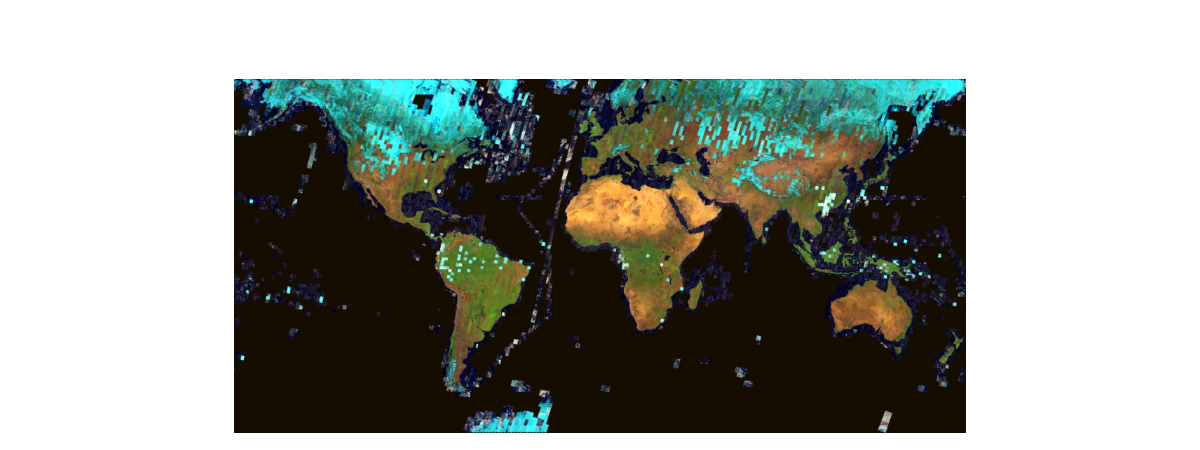

In [6]:
l8_lyr = l8_views.layers[0]
l8_lyr

### Creating `ImageryLayer` from an image service url

`ImageryLayer` objects can also be constructed from an image service URL:

In [7]:
img_svc_url = 'https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer'

In [8]:
from arcgis.raster import ImageryLayer

In [9]:
landsat_lyr = ImageryLayer(img_svc_url)

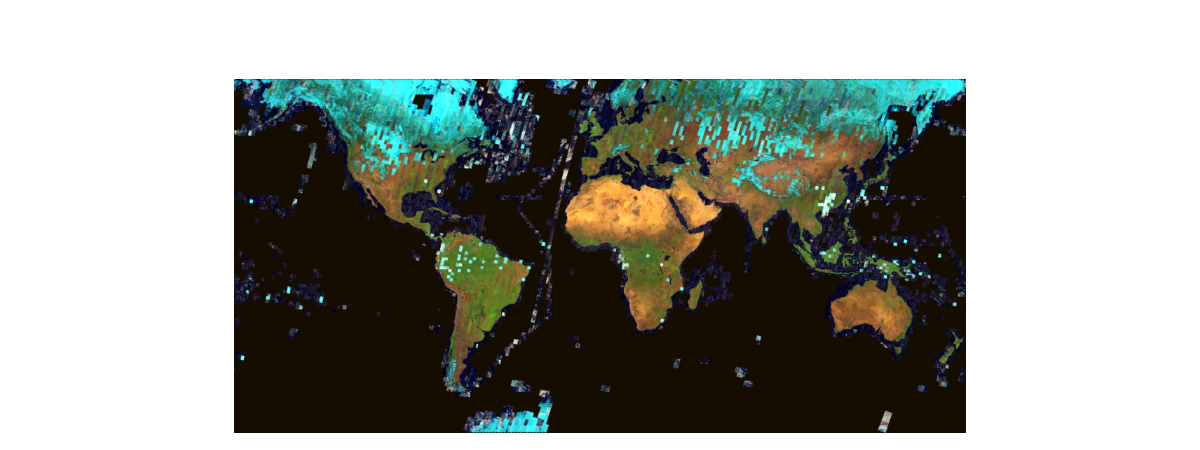

In [10]:
landsat_lyr

### Creating `ImageryLayer` from secure image services

If the imagery layer is a served by a secure image service, pass in the `GIS` object to the `ImageryLayer` constructor to specify the GIS which should be used to connect to the service.

In [11]:
# portal = GIS("portal url", "username","password", verify_cert=False)
portal = GIS(url='https://pythonapi.playground.esri.com/portal', username='arcgis_python', password='amazing_arcgis_123', verify_cert=False)

Setting `verify_cert` to False is a security risk, use at your own risk.


In [12]:
secure_url = 'https://dev003248.esri.com:6443/arcgis/rest/services/ImgSrv_Landast_Montana2015/ImageServer'

In [13]:
secure_img_lyr = ImageryLayer(secure_url, portal)

In [14]:
secure_img_lyr.url

'https://dev003248.esri.com:6443/arcgis/rest/services/ImgSrv_Landast_Montana2015/ImageServer'

## Properties of an `ImageryLayer` object
The `properties` property on an `ImageryLayer` object provides a dictionary representation of all its properties. However, you can access individual properties as attributes as well:

In [15]:
landsat_lyr.properties.name

'Landsat8_Views'

In [16]:
landsat_lyr.properties['description']

'Multispectral Landsat 8 OLI Image Service covering the landmass of the World. This service includes 8-band multispectral scenes, at 30 meter resolution. It can be used for mapping and change detection of agriculture, soils, vegetation health, water-land features and boundary studies. Using on-the-fly processing, the raw DN values are transformed to scaled (0 - 10000) apparent reflectance values and then different service based renderings for band combinations and indices are applied. The service is updated on a daily basis to include the latest best scenes from the USGS.'

The `capabilities` property is useful to know what kinds of operations can be performed on the imagery layer.

In [17]:
landsat_lyr.properties.capabilities

'Image,Metadata,Catalog,Mensuration'

You can access the allowed mosaic methods using the `allowedMosaicMethods` property.

In [18]:
landsat_lyr.properties.allowedMosaicMethods

'ByAttribute,Center,NorthWest,Nadir,LockRaster,None'

## Raster Functions

Imagery Layers can be published with raster functions that can be used to change the visualization of the imagery layer using  on-the-fly image processing at display resolution. Raster functions are lightweight and process only the pixels visible on your screen, in memory, without creating intermediate files. Raster functions can also be applied at source resolution across the extent of an Imagery Layer using the distributed raster analytics capability provided by Image Server.

Raster Functions are powerful because you can chain them together and apply them on huge rasters and mosaics.

The code below cycles through the raster functions available with the landsat layer:

In [19]:
for fn in landsat_lyr.properties.rasterFunctionInfos:
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


## Visualizing imagery layers

`ImageryLayer`s can be added to the map widget for visualization:


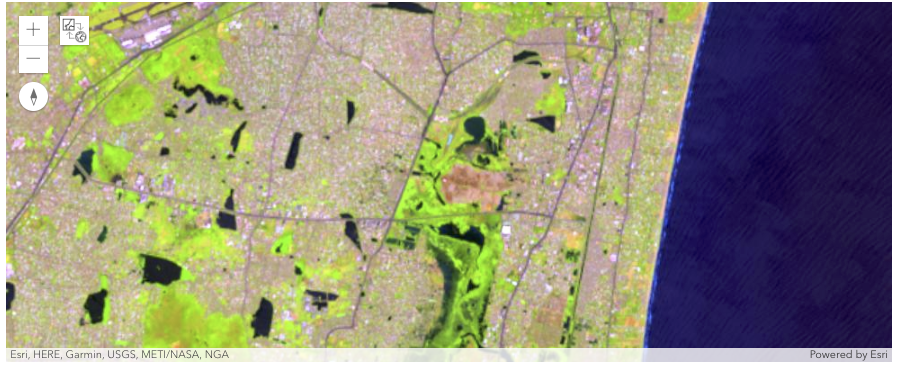

In [31]:
map = gis.map("Pallikaranai", zoomlevel=13)
map

In [28]:
map.add_layer(landsat_lyr)

### Performing on-the-fly image processing using raster functions
The utility of raster functions is better seen when we interactively cycle through these raster functions and apply them to the map, like the code below does. This is using on-the-fly image processing at display resolution to cycle through the various raster functions, and showing how the layer can be visualized using these different raster functions published with the layer:

In [22]:
import time
from arcgis.raster.functions import apply

for fn in landsat_lyr.properties.rasterFunctionInfos:
    print(fn['name'])
    map.remove_layers()
    map.add_layer(apply(landsat_lyr, fn['name']))
    time.sleep(2)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


### Using well-known raster functions
In addition to the raster functions that are published as part of an imagery layer, users can make use of a few [well-known raster functions](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Raster_function_objects/02r3000000rv000000/). For instance, in the example below, let us apply an index called [NDVI](http://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/band-arithmetic-function.htm) which can be computed using [BandArithmetic](http://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/band-arithmetic-function.htm) raster function.

SAVI - The Soil-Adjusted Vegetation Index (SAVI) is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low. SAVI is computed as below, where L is the vegetation correction factor and varies from 1 to 0. A value L = 1 is used for no vegetation cover and L=0 for high vegetation cover.

    SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)



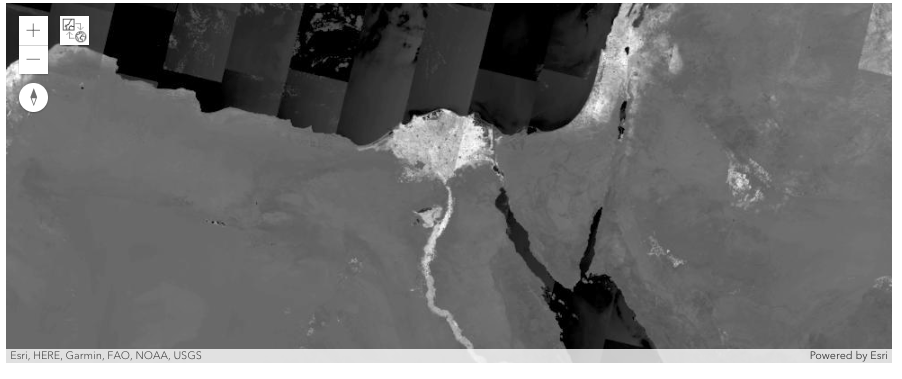

In [32]:
savi_map = gis.map("Cairo", zoomlevel=6)
savi_map

In [29]:
from arcgis.raster.functions import savi

savi_map.add_layer(savi(landsat_lyr, band_indexes="5 4 0.3"))

In the example above, we used one of a 'well-known raster function' `BandArithmetic` to apply a vegetation index. This index illustrates how the banks and delta of the Nile river appears fertile in a relatively an arid Sahara desert.

### Chaining raster functions
Developers can chaining different raster functions. For instance, the code below is using `ExtractBand` function to create a [4,5,3] band combination, and applying the `Stretch` function to get the land-water boundary visualization that makes it easy to see where land is and where water is. Its worth noting that the raster function is applied at display resolution and only for the visible extent using on the fly image processing.

Let us apply this raster function to the imagery layer to visualize the results. The raster function extracts the [4, 5, 3] band combination from Landsat data that makes it easy to visualize where land is and where water is, as seen below:

In [25]:
from arcgis.raster.functions import *

land_water = stretch(extract_band(landsat_lyr, [4, 5, 3]),
                     stretch_type='PercentClip',
                     min_percent=2, 
                     max_percent=2,
                     dra=True, 
                     gamma=[1, 1, 1])


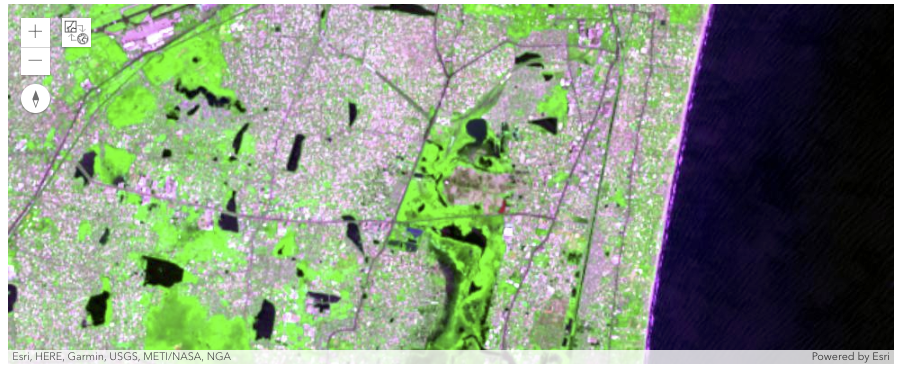

In [33]:
map2 = gis.map("Pallikaranai", zoomlevel=13)
map2

In [30]:
map2.add_layer(land_water)